# exploratory_analysis

این نوت‌بوک شامل بخش‌های بارگذاری داده، پاک‌سازی، تحلیل اکتشافی و مصورسازی است.

# **عنوان پروژه:**

# **پیش‌بینی انرژی بایندینگ هسته‌ای با استفاده از یادگیری عمیق**

# **Predicting Nuclear Binding Energy Using Deep Learning**


---


توضیح کلی پروژه:

این پروژه به بررسی و پیش‌بینی انرژی بایندینگ هسته‌ای با استفاده از مدل‌های یادگیری عمیق می‌پردازد. انرژی بایندینگ به انرژی‌ای اشاره دارد که برای جداسازی نوکلئون‌ها (پروتون‌ها و نوترون‌ها) از یک هسته نیاز است. این انرژی به شدت بر پایداری هسته تأثیر می‌گذارد و به درک بهتر رفتار هسته‌ها کمک می‌کند. هدف این پروژه طراحی و پیاده‌سازی یک مدل شبکه عصبی عمیق برای پیش‌بینی انرژی بایندینگ هسته‌ای بر اساس ویژگی‌های مختلف نوکلئون‌ها و ساختار هسته است.



---


دیتاست‌های مورد استفاده:
1. National Nuclear Data Center (NNDC):
 اطلاعات گسترده‌ای در مورد ویژگی‌های هسته‌ای و انرژی بایندینگ.
2. AMDC (Atomic Mass Data Center):
 داده‌های مربوط به جرم اتمی و انرژی بایندینگ هسته‌ای.
3. Nuclear Structure and Decay Data (ENSDF):
 اطلاعات مربوط به ساختار هسته‌ای و تجزیه هسته‌ها.
4. KADoNiS (KADoNiS Database):
 اطلاعات مربوط به مقادیر بایندینگ هسته‌ای و دیگر ویژگی‌ها.
5. NuDat (Nuclear Data):
 داده‌های هسته‌ای شامل انرژی بایندینگ و ویژگی‌های هسته‌ها.


---



**با این پروژه یاد میگیریم چگونه بر اساس داده‌های ورودی، انرژی بایندینگ هسته‌ای را سریع و دقیق پیش‌بینی کنیم، که می‌تواند به عنوان یک ابزار کمکی بسیار کاربردی برای دانشمندان و مهندسان هسته‌ای باشد..**

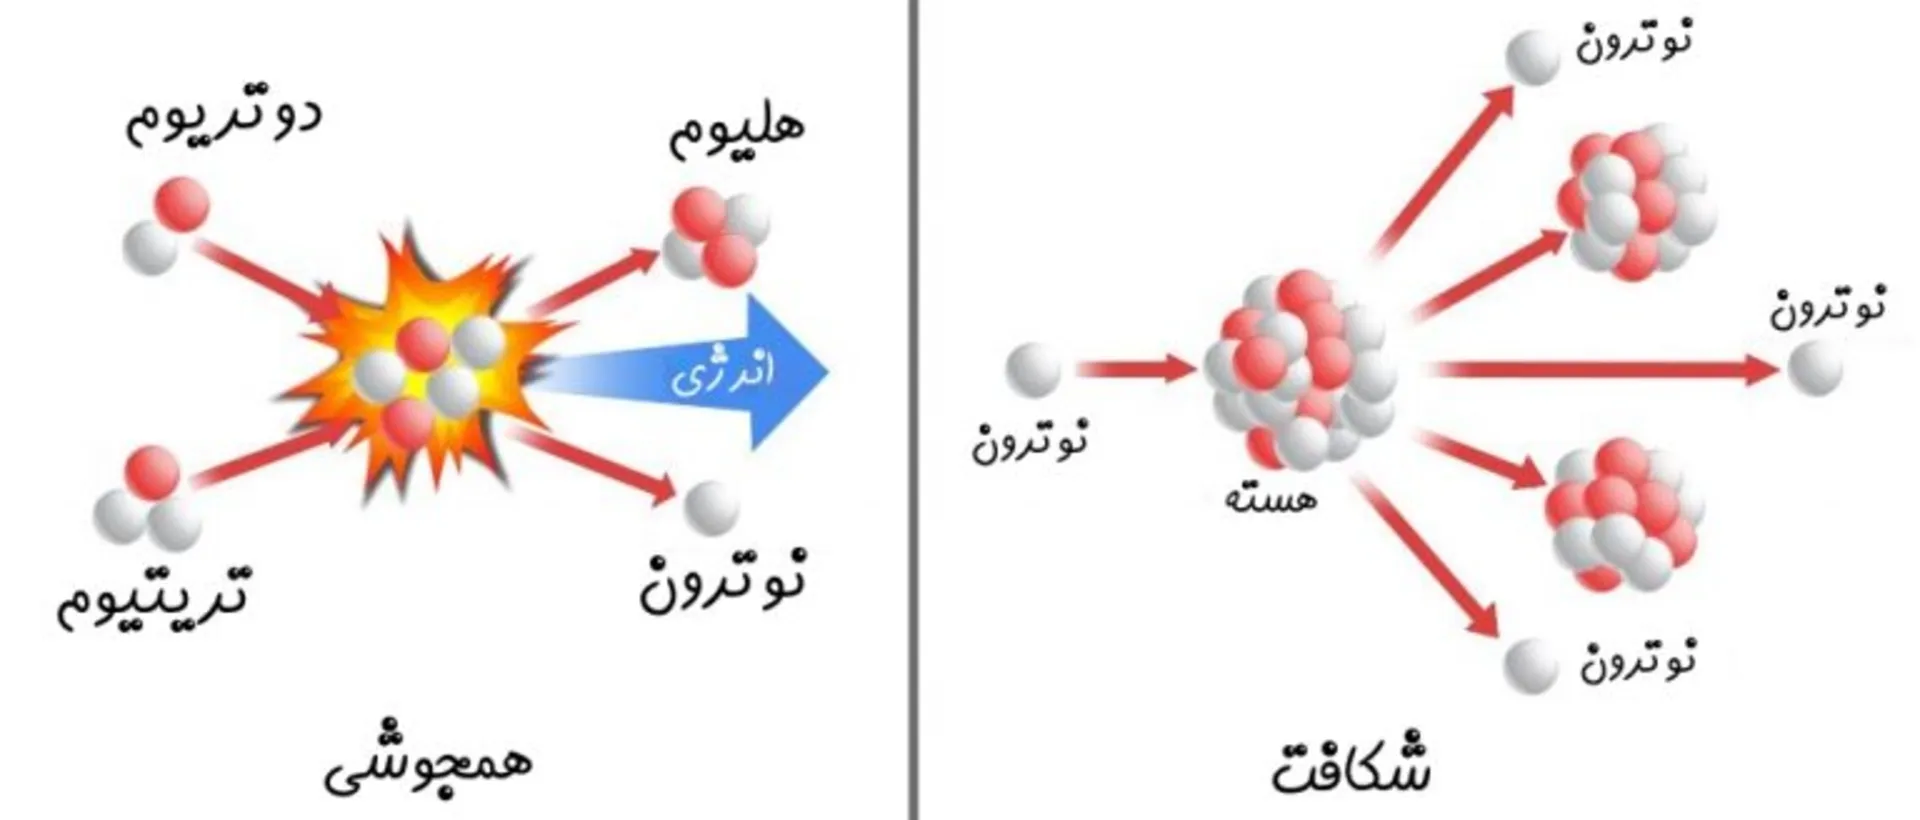

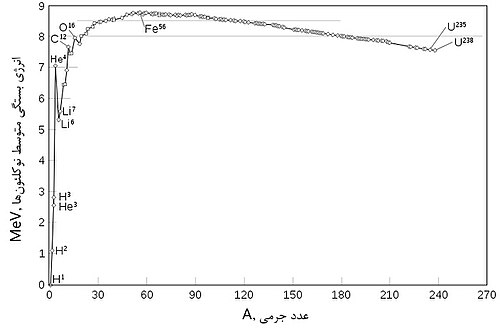

##0. Setup & Configuration

##1. Load Dataset

In [ ]:
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset loaded successfully: {df.shape}")
except Exception as e:
    raise SystemExit(f"Exiting due to dataset loading error: {str(e)}")

print("\nHead:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nMissing values per column (descending):")
print(df.isnull().sum().sort_values(ascending=False))


Dataset loaded successfully: (3400, 17)

Head:
    cc  NZ  N  Z   A  el    o  mass_excess  mass_excess_unc  binding_energy  \
0  NaN   0  5  5  10   B  NaN    12050.609            0.015        6475.083   
1  NaN  -2  4  6  10   C  NaN    15698.672            0.070        6032.042   
2  NaN  -4  3  7  10   N   --    38800.026          400.000        3643.672   
3  0.0   5  8  3  11  Li    x    40728.254            0.615        4155.381   
4  NaN   3  7  4  11  Be  NaN    20177.167            0.238        5952.540   

   binding_energy_unc beta_type  beta_energy  beta_unc   I  atomic_mass  \
0               0.002        B-    -3648.062     0.069  10    12936.862   
1               0.007        B-   -23101.355   400.000  10    16853.218   
2              40.000        B-          NaN       NaN  10    41653.543   
3               0.056        B-    20551.087     0.659  11    43723.581   
4               0.022        B-    11509.460     0.238  11    21661.081   

   atomic_mass_unc  
0     

##2. Basic Validation

In [ ]:
if TARGET_COLUMN not in df.columns:
    raise ValueError(f"Target column '{TARGET_COLUMN}' not found. Available: {df.columns.tolist()}")

# Drop columns with >50% missing
missing_pct = df.isnull().mean()
cols_to_drop = missing_pct[missing_pct > 0.5].index.tolist()
if cols_to_drop:
    print(f"\nDropping columns with >50% missing: {cols_to_drop}")
    df = df.drop(columns=cols_to_drop)

# Separate features/target
y = df[TARGET_COLUMN]
X = df.drop(columns=[TARGET_COLUMN])

# Identify column types
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\nNumeric columns ({len(numeric_cols)}): {numeric_cols[:10]}{'...' if len(numeric_cols)>10 else ''}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols[:10]}{'...' if len(categorical_cols)>10 else ''}")



Dropping columns with >50% missing: ['cc']

Numeric columns (12): ['NZ', 'N', 'Z', 'A', 'mass_excess', 'mass_excess_unc', 'binding_energy_unc', 'beta_energy', 'beta_unc', 'I']...
Categorical columns (3): ['el', 'o', 'beta_type']


##4. Preprocessing Pipelines

In [ ]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).astype(np.float32)
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).astype(np.float32)

joblib.dump(y_scaler, os.path.join(ARTIFACT_DIR, "y_scaler.pkl"))

# Convert features to float32 for TensorFlow
X_train_proc = X_train_proc.astype(np.float32)
X_test_proc = X_test_proc.astype(np.float32)


##8. Evaluation

##9. Visualizations

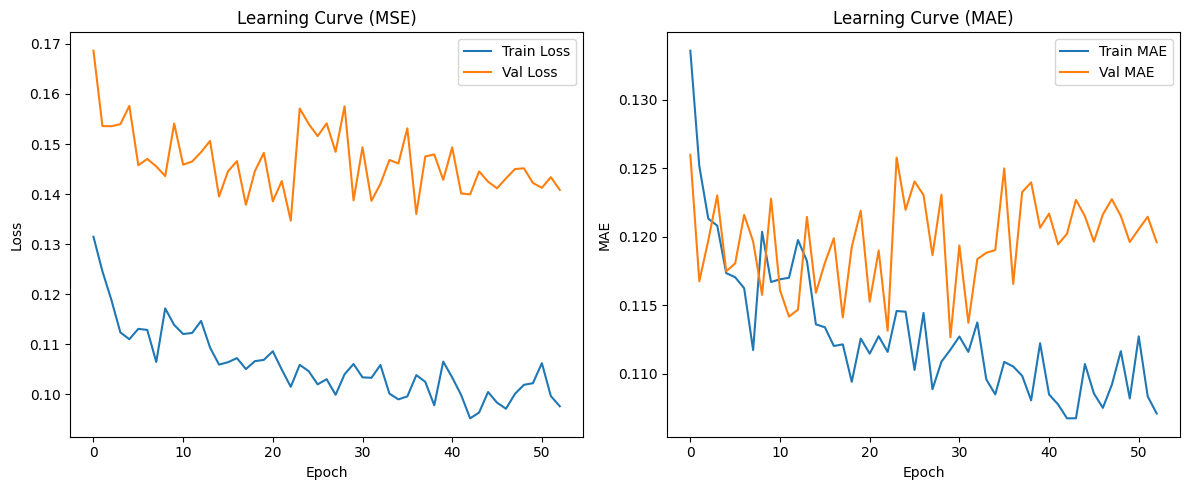

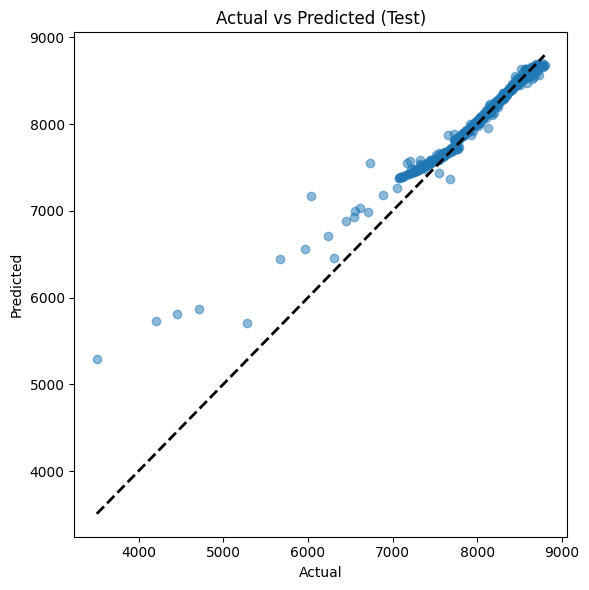

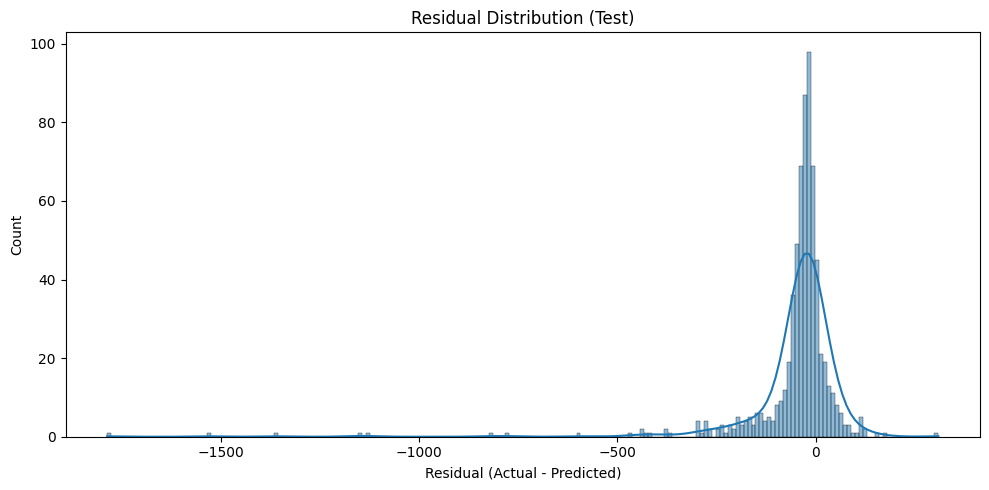

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Learning Curve (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Val MAE")
plt.title("Learning Curve (MAE)")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "learning_curves.png"), dpi=300)
plt.show()

# Predicted vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "k--", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test)")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "actual_vs_pred.png"), dpi=300)
plt.show()

# Residuals
residuals = y_test.values.reshape(-1, 1) - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals.flatten(), kde=True)
plt.title("Residual Distribution (Test)")
plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "residuals_hist.png"), dpi=300)
plt.show()
